# EDA

En este apartado realizaremos un EDA de las bases de datos relacionadas con el proyecto en cuestion, comenzaremos con la base de datos homicidios y luego lesiones, pasando por los siguientes puntos:<br>
<ul><li>Búsqueda de valores faltantes.</li><li>Valores atípicos/extremos u outliers</li> <li>Registros duplicados</li></ul>

Ademas, buscaremos dar significado a las bases de dato dentro de la problematica.

## Homicidios

### Lectura de la informacion

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Modulo as md
from datetime import datetime, time
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as date
import requests
from io import BytesIO
import pandas as pd

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df_homicidios = pd.read_excel('Datasets/homicidios.xlsx',sheet_name='HECHOS')
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Paneo general

In [ ]:
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [ ]:
for column in df_homicidios.columns:
    print(f'Cantidad de registros unicos de la columna {column}: {df_homicidios[column].unique().shape[0]}')

Cantidad de registros unicos de la columna ID: 696
Cantidad de registros unicos de la columna N_VICTIMAS: 3
Cantidad de registros unicos de la columna FECHA: 598
Cantidad de registros unicos de la columna AAAA: 6
Cantidad de registros unicos de la columna MM: 12
Cantidad de registros unicos de la columna DD: 31
Cantidad de registros unicos de la columna HORA: 375
Cantidad de registros unicos de la columna HH: 25
Cantidad de registros unicos de la columna LUGAR_DEL_HECHO: 683
Cantidad de registros unicos de la columna TIPO_DE_CALLE: 4
Cantidad de registros unicos de la columna Calle: 280
Cantidad de registros unicos de la columna Altura: 127
Cantidad de registros unicos de la columna Cruce: 318
Cantidad de registros unicos de la columna Dirección Normalizada: 636
Cantidad de registros unicos de la columna COMUNA: 16
Cantidad de registros unicos de la columna XY (CABA): 606
Cantidad de registros unicos de la columna pos x: 605
Cantidad de registros unicos de la columna pos y: 605
Cantida

In [ ]:
md.tipo_datos(df_homicidios)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,ID,[str],0.000000,0,[9]
1,N_VICTIMAS,[int],0.000000,0,[1]
2,FECHA,[Timestamp],0.000000,0,[19]
3,AAAA,[int],0.000000,0,[4]
4,MM,[int],0.000000,0,"[1, 2]"
5,DD,[int],0.000000,0,"[1, 2]"
6,HORA,"[time, str, datetime]",0.000000,0,"[8, 19, 2]"
7,HH,"[int, str]",0.000000,0,"[1, 2]"
8,LUGAR_DEL_HECHO,[str],0.000000,0,"[41, 33, 18, 37, 30, 28, 35, 34, 26, 52, 32, 5..."
9,TIPO_DE_CALLE,[str],0.000000,0,"[7, 8, 5, 9]"


#### ID

In [ ]:
# aparentemente esta relacionada con el anio del accidente y un identificador del nro de accidente...

md.indentificar_duplicados(df_homicidios,'ID')


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


Podemos decir que la columna ID tiene siempre 9 digitos, 4 correspondientes al anio, un guion y 4 correspondientes al nro de accidente, no posee duplicados y su tipo de datos es string.

#### N_Victimas

In [ ]:
print(df_homicidios.N_VICTIMAS.unique()) # vemos que el maximo numero de victimas es 3 y que en todos los casos hay victimas.

[1 2 3]


In [ ]:
df_homicidios.N_VICTIMAS.sum()

717

#### Fecha

In [ ]:
print(f'El periodo analizado va desde {df_homicidios.FECHA.min()} a {df_homicidios.FECHA.max()}')

# es raro que no haya accidentes el 31 de diciembre del 2021 pero lo dejaremos asi ya que es solo 1 dia.
# no tiene columna hora integrada en la fecha

El periodo analizado va desde 2016-01-01 00:00:00 a 2021-12-30 00:00:00


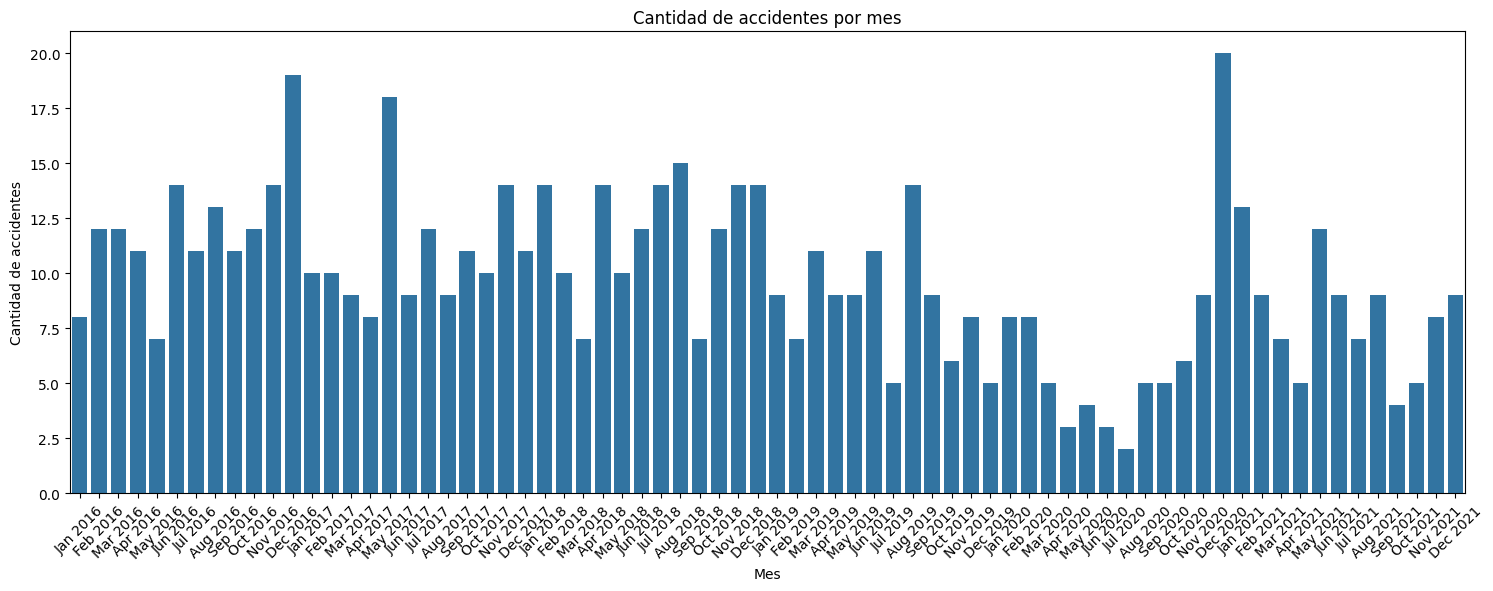

In [ ]:
mensual = df_homicidios[['FECHA','ID']].resample('M',on='FECHA').count()
mensual.index = mensual.index.to_period('M')
plt.figure(figsize=(18,6))
sns.barplot(data=mensual,y='ID',x=mensual.index.strftime('%b %Y'))
plt.title('Cantidad de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')

plt.xticks(rotation=45)

plt.show()

Vemos que hay algunos maximos, pero no quedan muy claros, cuales seran? Tendran correlacion con ciertos meses?

<Axes: title={'center': 'Promedio accidentes por mes'}, xlabel='Mes'>

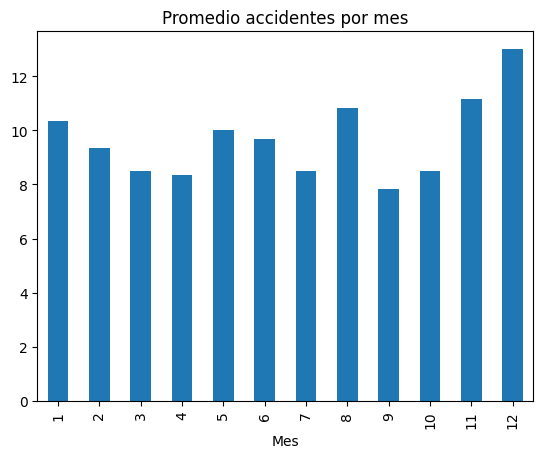

In [ ]:
mensual['Anio'] = mensual.index.year
mensual['Mes'] = mensual.index.month
mensual.groupby(['Mes', 'Anio']).mean().groupby('Mes').mean().plot(kind='bar',legend=False,title='Promedio accidentes por mes')



In [ ]:
# Vemos que los meses con mas accidentes son a fin de anio.

#### AAAA

Deberia respetar lo visto antes...

In [ ]:
df_homicidios['Anio'] = df_homicidios['FECHA'].dt.year
for index, row in df_homicidios.iterrows():
    if row['Anio'] != row['AAAA']:
        print(f'Error en el registro nro. {index}')
# Todo ok, eliminemos la columna creada

In [ ]:
df_homicidios.drop(columns='Anio',inplace=True)
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


#### MM

In [ ]:
df_homicidios['Mes'] = df_homicidios['FECHA'].dt.month
for index, row in df_homicidios.iterrows():
    if row['Mes'] != row['MM']:
        print(f'Error en el registro nro. {index}')
# Todo ok, eliminemos la columna creada

In [ ]:
df_homicidios.drop(columns='Mes',inplace=True)
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


#### DD

In [ ]:
df_homicidios['Dia'] = df_homicidios['FECHA'].dt.day
for index, row in df_homicidios.iterrows():
    if row['Dia'] != row['DD']:
        print(f'Error en el registro nro. {index}')

Error en el registro nro. 64


In [ ]:
df_homicidios.iloc[64]

ID                                                               2016-0087
N_VICTIMAS                                                               1
FECHA                                                  2016-07-02 00:00:00
AAAA                                                                  2016
MM                                                                       7
DD                                                                       3
HORA                                                              00:10:00
HH                                                                       0
LUGAR_DEL_HECHO           AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS
TIPO_DE_CALLE                                                    AUTOPISTA
Calle                           AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI
Altura                                                                 NaN
Cruce                                                                  NaN
Dirección Normalizada    

In [ ]:
# Creamosle a la columna FECHA y cambiemos la otra:
df_homicidios.loc[64,'DD'] = 2

In [ ]:
for index, row in df_homicidios.iterrows():
    if row['Dia'] != row['DD']:
        print(f'Error en el registro nro. {index}')
# Todo ok, eliminemos la columna creada

In [ ]:
df_homicidios.drop(columns='Dia',inplace=True)
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


#### HORA y HH

In [ ]:
df_homicidios['HORA'] = df_homicidios.HORA.apply(md.horas)

In [ ]:
df_homicidios[df_homicidios['HORA']=='Sin Dato']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,Sin Dato,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Tenemos un registro sin valor en ambas columnas.

In [ ]:
for index, row in df_homicidios.iterrows():
    if not isinstance(row['HORA'],str):
        if row['HORA'].hour != row['HH']:
          print(f'Error en el registro nro. {index}')
    else:
       print(row)

ID                                                    2019-0103
N_VICTIMAS                                                    1
FECHA                                       2019-12-18 00:00:00
AAAA                                                       2019
MM                                                           12
DD                                                           18
HORA                                                   Sin Dato
HH                                                           SD
LUGAR_DEL_HECHO                         PAZ, GRAL. AV. Y GRIVEO
TIPO_DE_CALLE                                          GRAL PAZ
Calle                                            PAZ, GRAL. AV.
Altura                                                      NaN
Cruce                                                    GRIVEO
Dirección Normalizada                   PAZ, GRAL. AV. y GRIVEO
COMUNA                                                       11
XY (CABA)                Point (94643.11

Es el unico registro nulo, completemos con la moda para evitar dificultades de visualizacion mas adelante.

In [ ]:
print(f'La hora mas comun para tener accidentes es {df_homicidios.HORA.mode()[0]}')
df_homicidios.loc[518,'HH'] = df_homicidios.HORA.mode()[0].hour
df_homicidios.loc[518,'HORA'] = df_homicidios.HORA.mode()[0]

La hora mas comun para tener accidentes es 09:00:00


#### Lugar del Hecho, Calle, Direccion Normalizada, Cruce, Altura

In [ ]:
muestreo = df_homicidios[['LUGAR_DEL_HECHO','Calle','Dirección Normalizada','Cruce','Altura']].sample(n=15)
muestreo

,LUGAR_DEL_HECHO,Calle,Dirección Normalizada,Cruce,Altura
320,Av. Gral. Paz y Av. Rivadavia,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y RIVADAVIA AV.",RIVADAVIA AV.,NaN
126,AV 27 DE FEBRERO Y AV ESCALADA,27 DE FEBRERO AV.,27 DE FEBRERO AV. y ESCALADA AV.,ESCALADA AV.,NaN
634,"PAZ, GRAL. AV. Y MOSCONI GENERAL AV.","PAZ, GRAL. AV.","PAZ, GRAL. AV. y MOSCONI GENERAL AV.",MOSCONI GENERAL AV.,NaN
315,"La Plata Av. y Fernandez De La Cruz, F., Gral....",LA PLATA AV.,"LA PLATA AV. y FERNANDEZ DE LA CRUZ, F., GRAL....","FERNANDEZ DE LA CRUZ, F., GRAL. AV.",NaN
428,"PAZ, GRAL. AV. Y ALBERDI, JUAN BAUTISTA AV.","PAZ, GRAL. AV.","PAZ, GRAL. AV. y ALBERDI, JUAN BAUTISTA AV.","ALBERDI, JUAN BAUTISTA AV.",NaN
36,TIMOTEO GORDILLO Y AV FERNANDEZ DE LA CRUZ,"GORDILLO, TIMOTEO","GORDILLO, TIMOTEO y FERNANDEZ DE LA CRUZ, F., ...","FERNANDEZ DE LA CRUZ, F., GRAL. AV.",NaN
432,SAN MARTIN AV. 5638,SAN MARTIN AV.,SAN MARTIN AV. 5638,NaN,5638.0
332,Cordoba Av. y Thames,CORDOBA AV.,CORDOBA AV. y THAMES,THAMES,NaN
189,PARAGUAY Y AV. CALLAO,PARAGUAY,PARAGUAY y CALLAO AV.,CALLAO AV.,NaN
143,REPUBLICA BOLIVARIANA DE VENEZUELA Y SAAVEDRA,REPUBLICA BOLIVARIANA DE VENEZUELA,REPUBLICA BOLIVARIANA DE VENEZUELA y SAAVEDRA,SAAVEDRA,NaN


In [ ]:
print(df_homicidios.Altura.dropna().shape[0])
print(df_homicidios.Cruce.dropna().shape[0])
print(f'Los registros suman un total de {df_homicidios.Altura.dropna().shape[0]+df_homicidios.Cruce.dropna().shape[0]}, y el total del df es de {df_homicidios.shape[0]}, diferencia: {df_homicidios.shape[0]-df_homicidios.Altura.dropna().shape[0]-df_homicidios.Cruce.dropna().shape[0]}')
df_homicidios[['Altura','Cruce']].dropna()

129
525
Los registros suman un total de 654, y el total del df es de 696, diferencia: 42


,Altura,Cruce


De aqui podemos ver que si el accidente ocurrio en un cruce, aparece una string en la columna cruce, caso contrario, aparece la altura... aunque hay unos 42 registros que no tienen ninguna de los dos.

Decidimos eliminar la altura, ya que no nos sirve... y completar la columna cruce con 'SI' o 'NO' para identificar que accidentes fueron en un cruce y cuales no, independientemente de en que cruce.

In [ ]:
df_homicidios.drop(columns='Altura',inplace=True)
df_homicidios.Cruce.fillna('NO',inplace=True)
df_homicidios['Cruce'] = df_homicidios.Cruce.apply(lambda x: 'SI' if x != 'NO' else x)
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


([<matplotlib.patches.Wedge at 0x17f125fe3d0>,
 [Text(0.7882785092870068, 0.7672137849362813, 'NO'),
  Text(-0.7882784374552646, -0.7672138587402385, 'SI')],
 [Text(0.42997009597473096, 0.4184802463288807, '24.6%'),
  Text(-0.4299700567937807, -0.4184802865855846, '75.4%')])

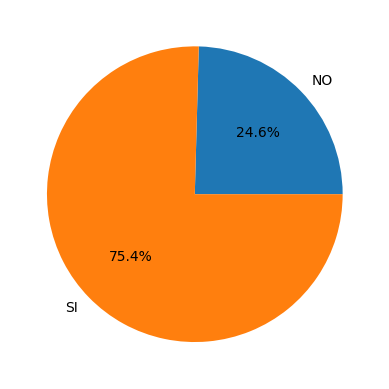

In [ ]:
pie = df_homicidios.groupby('Cruce')['ID'].count()
plt.pie(pie,labels=pie.index,autopct='%1.1f%%')

Vemos que hay mas de un 75% de los accidentes que ocurren en los cruces... interesante para pensar.

Terminaremos completando 'Sin dato' en los registros pendientes sin datos de 'Direccion Normalizada'.

In [ ]:
df_homicidios['Dirección Normalizada'] = df_homicidios['Dirección Normalizada'].fillna('Sin Dato')

Veamos ahora porque Calle tiene valores float...

In [ ]:
df_homicidios[df_homicidios.Calle.apply(lambda x: isinstance(x,float))]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NO,Sin Dato,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [ ]:
df_homicidios.loc[119,'Calle'] = 'Sin Dato'

#### Tipo de calle

In [ ]:
df_homicidios.TIPO_DE_CALLE.unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

Text(0, 0.5, 'Cantidad de accidentes')

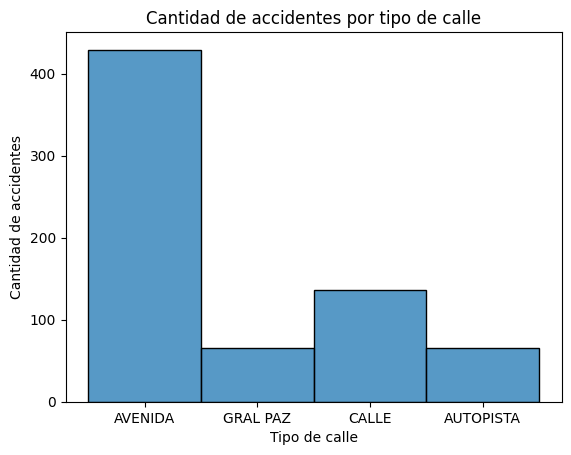

In [ ]:
sns.histplot(data=df_homicidios,x='TIPO_DE_CALLE',element='bars',bins=4)
plt.title('Cantidad de accidentes por tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de accidentes')

Unifiquemos Gral Paz con Autopista, ya que son lo mismo.

In [ ]:
df_homicidios.TIPO_DE_CALLE = df_homicidios.TIPO_DE_CALLE.apply(lambda x: 'AUTOPISTA' if x == 'GRAL PAZ' else x)
df_homicidios.TIPO_DE_CALLE.unique()

array(['AVENIDA', 'AUTOPISTA', 'CALLE'], dtype=object)

#### COMUNA

In [ ]:
df_homicidios.COMUNA.value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

In [ ]:
df_homicidios[df_homicidios['COMUNA']==0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,Sin Dato,NO,Sin Dato,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


No existe la comuna 0... la tomaremos como sin dato pero mantendremos el valor para mantener todo como int.

#### XY, pos x, pos y

In [ ]:
df_homicidios['XY (CABA)'].unique().max() # son variables de tipo point, con coordenadas segun el sistema de CABA.. no muy util para representar


'Point (99925.51296558 100002.14427355)'

In [ ]:
nulos_XY = df_homicidios[df_homicidios['XY (CABA)'] == 'Point (. .)'].shape[0]
nulos_x = df_homicidios[df_homicidios['pos x'] == '.'].shape[0]
nulos_y = df_homicidios[df_homicidios['pos y'] == '.'].shape[0]
print(f'Registros nulos: XY: {nulos_XY} \n pos X: {nulos_x} \n pos y: {nulos_y}')


Registros nulos: XY: 14 
 pos X: 12 
 pos y: 12


In [ ]:
# reemplazamos con 0 para poder filtrar mas adelante:
df_homicidios['pos x'] = df_homicidios['pos x'].replace('.', 0.0)
df_homicidios['pos y'] = df_homicidios['pos y'].replace('.', 0.0)
df_homicidios['XY (CABA)'] = df_homicidios['XY (CABA)'].replace('Point (. .)', 0.0)

In [ ]:
nulos_XY = df_homicidios[df_homicidios['XY (CABA)'] == 'Point (. .)'].shape[0]
nulos_x = df_homicidios[df_homicidios['pos x'] == '.'].shape[0]
nulos_y = df_homicidios[df_homicidios['pos y'] == '.'].shape[0]
print(f'Registros nulos: XY: {nulos_XY} \n pos X: {nulos_x} \n pos y: {nulos_y}')

Registros nulos: XY: 0 
 pos X: 0 
 pos y: 0


In [ ]:
df_homicidios['pos x'] = df_homicidios['pos x'].apply(lambda x: float(x))
df_homicidios['pos y'] = df_homicidios['pos y'].apply(lambda x: float(x))

In [ ]:
df_homicidios[df_homicidios['pos x'].apply(lambda x: isinstance(x,str))]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [ ]:
df_homicidios[df_homicidios['pos y'].apply(lambda x: isinstance(x,str))]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [ ]:
print('Variable pos x entre valores: {} y {}'.format(df_homicidios['pos x'].min(),df_homicidios['pos x'].max()))
print('Variable pos y entre valores: {} y {}'.format(df_homicidios['pos y'].min(),df_homicidios['pos y'].max()))

Variable pos x entre valores: -58.52994219 y 0.0
Variable pos y entre valores: -34.70524971 y 0.0


Entonces, no hay valores no congruentes en pos x y pos y... y XY no es una columna que vayamos a utilizar en el futuro.


#### Participantes, Victima, Acusado

In [ ]:
df_homicidios.VICTIMA.unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [ ]:
# pasamos SD a 'Sin Dato', peaton_moto no esta en el diccionario
df_homicidios[df_homicidios.VICTIMA.isin(['PEATON_MOTO','OBJETO FIJO'])]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,AUTOPISTA,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.494911,-34.547956,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.527838,-34.610470,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


In [ ]:
# pasemos ambos casos a 'OTRO'
df_homicidios['VICTIMA'] = df_homicidios['VICTIMA'].replace({'PEATON_MOTO':'OTRO','OBJETO FIJO':'OTRO','SD':'Sin Dato'})

In [ ]:
df_homicidios.ACUSADO.unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [ ]:
# no vemos datos por fuera del diccionario, pero reemplacemos SD
df_homicidios['ACUSADO'] = df_homicidios['ACUSADO'].replace({'SD':'Sin Dato'})

In [ ]:
# repasemos como queda nuestro df
md.tipo_datos(df_homicidios)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,ID,[str],0.0,0,[9]
1,N_VICTIMAS,[int],0.0,0,[1]
2,FECHA,[Timestamp],0.0,0,[19]
3,AAAA,[int],0.0,0,[4]
4,MM,[int],0.0,0,"[1, 2]"
5,DD,[int],0.0,0,"[1, 2]"
6,HORA,[time],0.0,0,[8]
7,HH,[int],0.0,0,"[1, 2]"
8,LUGAR_DEL_HECHO,[str],0.0,0,"[41, 33, 18, 37, 30, 28, 35, 34, 26, 52, 32, 5..."
9,TIPO_DE_CALLE,[str],0.0,0,"[7, 9, 5]"


Nos queda solamente XY como variable con distitno tipo de datos, y ningun nulo.

In [ ]:
df_homicidios.columns = df_homicidios.columns.str.title()

In [ ]:
df_homicidios.columns

Index(['Id', 'N_Victimas', 'Fecha', 'Aaaa', 'Mm', 'Dd', 'Hora', 'Hh',
       'Lugar_Del_Hecho', 'Tipo_De_Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Xy (Caba)', 'Pos X', 'Pos Y',
       'Participantes', 'Victima', 'Acusado'],
      dtype='object')

## VICTIMAS

In [ ]:
df_victimas = pd.read_excel('Datasets/homicidios.xlsx',sheet_name='VICTIMAS')
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [ ]:
df_victimas.shape

(717, 10)

In [ ]:
df_victimas.columns = df_victimas.columns.str.title()
df_victimas # la cantidad de datos correspondiente a la suma de victimas del df_homicidios

,Id_Hecho,Fecha,Aaaa,Mm,Dd,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [ ]:
df_victimas[df_victimas.duplicated()]

# ningun dato duplicado totalmente

,Id_Hecho,Fecha,Aaaa,Mm,Dd,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento


In [ ]:
md.tipo_datos(df_victimas)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id_Hecho,[str],0.0,0,[9]
1,Fecha,[Timestamp],0.0,0,[19]
2,Aaaa,[int],0.0,0,[4]
3,Mm,[int],0.0,0,"[1, 2]"
4,Dd,[int],0.0,0,"[1, 2]"
5,Rol,[str],0.0,0,"[9, 20, 6, 2, 8]"
6,Victima,[str],0.0,0,"[4, 6, 2, 9, 5]"
7,Sexo,[str],0.0,0,"[9, 8, 2]"
8,Edad,"[int, str]",0.0,0,"[2, 1]"
9,Fecha_Fallecimiento,"[datetime, str]",0.0,0,"[19, 2, 10]"


In [ ]:
for column in df_victimas.columns:
    print(f'Cantidad de registros unicos de la columna {column}: {df_victimas[column].unique().shape[0]}')

Cantidad de registros unicos de la columna Id_Hecho: 696
Cantidad de registros unicos de la columna Fecha: 598
Cantidad de registros unicos de la columna Aaaa: 6
Cantidad de registros unicos de la columna Mm: 12
Cantidad de registros unicos de la columna Dd: 31
Cantidad de registros unicos de la columna Rol: 5
Cantidad de registros unicos de la columna Victima: 8
Cantidad de registros unicos de la columna Sexo: 3
Cantidad de registros unicos de la columna Edad: 86
Cantidad de registros unicos de la columna Fecha_Fallecimiento: 563


696 Hechos unicos, son nuestros 696 accidentes.

### Paneo general

#### FECHA

In [ ]:
print(f'Fecha minima: {df_victimas.Fecha.min()}, fecha maxima: {df_victimas.Fecha.max()}')

Fecha minima: 2016-01-01 00:00:00, fecha maxima: 2021-12-30 00:00:00


ESta dentro de los valores de los accidentes vistos anteriormente.

#### AAAA, MM, DD

In [ ]:
for index, row in df_victimas.iterrows():
    if row['Fecha'].year != row['Aaaa']:
        print(f'Error en el registro nro. {index}')
    if row['Fecha'].month != row['Mm']:
        print(f'Error en el registro nro. {index}')
    if row['Fecha'].day != row['Dd']:
        print(f'Error en el registro nro. {index}')

Sin errores en las columnas!

In [ ]:
df_victimas.Aaaa.unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [ ]:
df_victimas.Mm.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [ ]:
np.sort(df_victimas.Dd.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Todo en orden entonces! sigamos.

#### ROL

In [ ]:
df_victimas.Rol.value_counts()

Rol
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

In [ ]:
# imputamos los datos con la moda
df_victimas.Rol.replace('SD','CONDUCTOR',inplace=True)

#### VICTIMA

In [ ]:
df_victimas.Victima.value_counts()

Victima
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

In [ ]:
df_victimas.Victima.replace('SD','Sin Dato',inplace=True) #veremos si podemos sacar la informacion del otro df

#### SEXO

In [ ]:
df_victimas.Sexo.value_counts()

Sexo
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

In [ ]:
# imputamos el dato con el valor mas frecuente:
df_victimas.Sexo.replace('SD','MASCULINO',inplace=True)

In [ ]:
df_victimas.Sexo.value_counts()

Sexo
MASCULINO    551
FEMENINO     166
Name: count, dtype: int64

#### EDAD

In [ ]:
print(df_victimas.Edad.value_counts())
sin_edad = df_victimas.Edad.value_counts()['SD']

Edad
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64


In [ ]:
print(f'Registros sin Edad: {sin_edad}, porcentaje sobre el total: {sin_edad/df_victimas.shape[0]*100:.2f}%')

Registros sin Edad: 53, porcentaje sobre el total: 7.39%


Vamos a tener que imputar valores, y lo vamos a hacer discirniendo el sexo y tipo de victima.

In [ ]:
promedio_edad = df_victimas[df_victimas.Edad != 'SD'].groupby(['Sexo','Victima'])['Edad'].mean()
promedio_edad

Sexo       Victima  
FEMENINO   AUTO              42.4
           BICICLETA    47.285714
           MOTO         30.323529
           PASAJEROS    73.666667
           PEATON        58.84375
MASCULINO  AUTO         39.973333
           BICICLETA    37.142857
           CARGAS       40.714286
           MOTO         32.210526
           MOVIL        36.333333
           PASAJEROS         44.0
           PEATON       51.302013
           Sin Dato          54.2
Name: Edad, dtype: object

Faltaria agregar el caso de Femenino y sin dato

In [ ]:
df_victimas[df_victimas.Edad != 'SD'].groupby(['Sexo'])['Edad'].mean()['FEMENINO']

50.76129032258064

In [ ]:
promedio_edad.loc['FEMENINO','Sin Dato'] = df_victimas[df_victimas.Edad != 'SD'].groupby(['Sexo'])['Edad'].mean()['FEMENINO']

In [ ]:
df_victimas[df_victimas.Edad == 'SD']

,Id_Hecho,Fecha,Aaaa,Mm,Dd,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,Sin Dato,MASCULINO,SD,SD
39,2016-0052,2016-04-20,2016,4,20,CONDUCTOR,MOTO,MASCULINO,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,CONDUCTOR,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,CONDUCTOR,Sin Dato,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,Sin Dato,FEMENINO,SD,SD


In [ ]:
df_victimas.Edad = df_victimas.apply(lambda x: int(promedio_edad[x['Sexo']][x['Victima']])  if x['Edad'] == 'SD' else x['Edad'],axis=1)

In [ ]:
df_victimas.iloc[30]

Id_Hecho                          2016-0041
Fecha                   2016-03-29 00:00:00
Aaaa                                   2016
Mm                                        3
Dd                                       29
Rol                    PASAJERO_ACOMPAÑANTE
Victima                                MOTO
Sexo                              MASCULINO
Edad                                     32
Fecha_Fallecimiento     2016-03-30 00:00:00
Name: 30, dtype: object

VErificamos que la imputacion se realizo correctamente!

In [ ]:
print(df_victimas.Edad.value_counts())

Edad
32    36
30    30
29    24
23    24
51    21
      ..
12     1
92     1
7      1
5      1
88     1
Name: count, Length: 85, dtype: int64


#### Fecha_Fallecimiento

In [ ]:
# No trataremos esta columna ya que no aporta informacion relevante para prevenir eventos.

In [ ]:
md.tipo_datos(df_victimas)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id_Hecho,[str],0.0,0,[9]
1,Fecha,[Timestamp],0.0,0,[19]
2,Aaaa,[int],0.0,0,[4]
3,Mm,[int],0.0,0,"[1, 2]"
4,Dd,[int],0.0,0,"[1, 2]"
5,Rol,[str],0.0,0,"[9, 20, 6, 8]"
6,Victima,[str],0.0,0,"[4, 6, 8, 9, 5]"
7,Sexo,[str],0.0,0,"[9, 8]"
8,Edad,[int],0.0,0,"[2, 1]"
9,Fecha_Fallecimiento,"[datetime, str]",0.0,0,"[19, 2, 10]"


## Eleccion de informacion

In [ ]:
df_victimas.columns

Index(['Id_Hecho', 'Fecha', 'Aaaa', 'Mm', 'Dd', 'Rol', 'Victima', 'Sexo',
       'Edad', 'Fecha_Fallecimiento'],
      dtype='object')

La informacion relacionada al hecho esta duplicada (Fecha, Aaaa, Mm y Dd) ya que se encuentra presente en la base de datos df_homicidios.

In [ ]:
df_victimas.drop(columns=['Fecha','Aaaa','Dd','Mm'],inplace=True)

VEamos si podemos usar la columna victimas en ambos para obtener una columna completa entre ambas.

In [ ]:
victima = df_victimas[['Id_Hecho','Victima']].merge(df_homicidios[['Id','Victima']],left_on='Id_Hecho',right_on='Id')
victima

,Id_Hecho,Victima_x,Id,Victima_y
0,2016-0001,MOTO,2016-0001,MOTO
1,2016-0002,AUTO,2016-0002,AUTO
2,2016-0003,MOTO,2016-0003,MOTO
3,2016-0004,MOTO,2016-0004,MOTO
4,2016-0005,MOTO,2016-0005,MOTO
...,...,...,...,...
712,2021-0092,PEATON,2021-0092,PEATON
713,2021-0093,MOTO,2021-0093,MOTO
714,2021-0094,MOTO,2021-0094,MOTO
715,2021-0095,MOTO,2021-0095,MOTO


In [ ]:
victima[victima.Victima_x == 'Sin Dato']

,Id_Hecho,Victima_x,Id,Victima_y
36,2016-0049,Sin Dato,2016-0049,Sin Dato
77,2016-0101,Sin Dato,2016-0101,Sin Dato
89,2016-0115,Sin Dato,2016-0115,Sin Dato
93,2016-0119,Sin Dato,2016-0119,Sin Dato
141,2016-0174,Sin Dato,2016-0174,Sin Dato
167,2017-0029,Sin Dato,2017-0029,Sin Dato
208,2017-0074,Sin Dato,2017-0074,Sin Dato
221,2017-0089,Sin Dato,2017-0089,Sin Dato
280,2017-0155,Sin Dato,2017-0155,Sin Dato


No tiene informacion adicional... vamos a eliminar la columna del df_victima entonces

In [ ]:
df_victimas.drop(columns='Victima',inplace=True)

In [ ]:
# dijimos que eliminabamos fecha fallecimiento tambien
df_victimas.drop(columns='Fecha_Fallecimiento',inplace=True)

In [ ]:
df_victimas.columns

Index(['Id_Hecho', 'Rol', 'Sexo', 'Edad'], dtype='object')

In [ ]:
df_homicidios.columns

Index(['Id', 'N_Victimas', 'Fecha', 'Aaaa', 'Mm', 'Dd', 'Hora', 'Hh',
       'Lugar_Del_Hecho', 'Tipo_De_Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Xy (Caba)', 'Pos X', 'Pos Y',
       'Participantes', 'Victima', 'Acusado'],
      dtype='object')

Las columnas Aaaa, Mm, Dd y Hh las podemos sacar de las columnas Fecha y Hora, eliminemoslas.

In [ ]:
df_homicidios.drop(columns=['Aaaa','Mm','Dd','Hh'],inplace=True)

La columna de Xy (Caba) no nos sirve, usaremos las coordenadas geograficas de pos x pos y

In [ ]:
df_homicidios.drop(columns='Xy (Caba)',inplace=True)

In [ ]:
df_homicidios.columns

Index(['Id', 'N_Victimas', 'Fecha', 'Hora', 'Lugar_Del_Hecho', 'Tipo_De_Calle',
       'Calle', 'Cruce', 'Dirección Normalizada', 'Comuna', 'Pos X', 'Pos Y',
       'Participantes', 'Victima', 'Acusado'],
      dtype='object')

## Unificacion de la informacion

In [ ]:
df = pd.merge(df_homicidios,df_victimas,left_on='Id',right_on='Id_Hecho',how='left').drop(columns=['Id_Hecho','N_Victimas'])

In [ ]:
df.head()

,Id,Fecha,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Cruce,Dirección Normalizada,Comuna,Pos X,Pos Y,Participantes,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,2016-01-10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,Sin Dato,CONDUCTOR,MASCULINO,18
4,2016-0005,2016-01-21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29


In [ ]:
df.shape

(717, 17)

In [ ]:
md.tipo_datos(df)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id,[str],0.0,0,[9]
1,Fecha,[Timestamp],0.0,0,[19]
2,Hora,[time],0.0,0,[8]
3,Lugar_Del_Hecho,[str],0.0,0,"[41, 33, 18, 37, 30, 28, 35, 34, 26, 52, 32, 5..."
4,Tipo_De_Calle,[str],0.0,0,"[7, 9, 5]"
5,Calle,[str],0.0,0,"[16, 14, 12, 17, 6, 26, 27, 15, 21, 8, 11, 20,..."
6,Cruce,[str],0.0,0,[2]
7,Dirección Normalizada,[str],0.0,0,"[54, 36, 19, 41, 39, 32, 29, 33, 34, 57, 12, 2..."
8,Comuna,[int],0.0,0,"[1, 2]"
9,Pos X,[float],0.0,0,"[12, 11, 18, 3, 10]"


## Analisis exploratorio conjunto

### Mensual

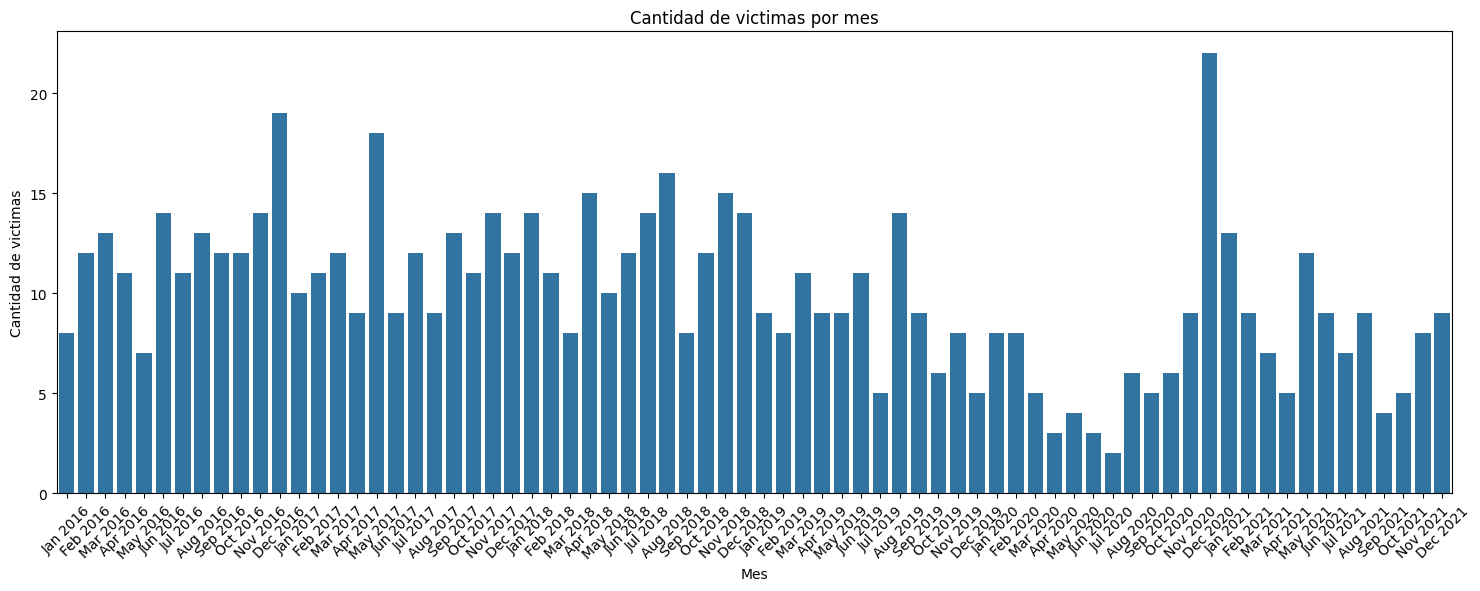

In [ ]:
# volvamos a ver lo relevado anteriormente pero por numero de victimas
mensual = df[['Fecha','Id']].resample('M',on='Fecha').count()
mensual.index = mensual.index.to_period('M')
plt.figure(figsize=(18,6))
sns.barplot(data=mensual,y='Id',x=mensual.index.strftime('%b %Y'))
plt.title('Cantidad de victimas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de victimas')

plt.xticks(rotation=45)

plt.show()

Vemos que durante el primer semestre del 2020 disminuyeron significativamente el numero de victimas, hecho que relaciono con las restricciones de circulacion por la pandemia de COVID-19.

<Axes: title={'center': 'Promedio victimas por mes'}, xlabel='Mes'>

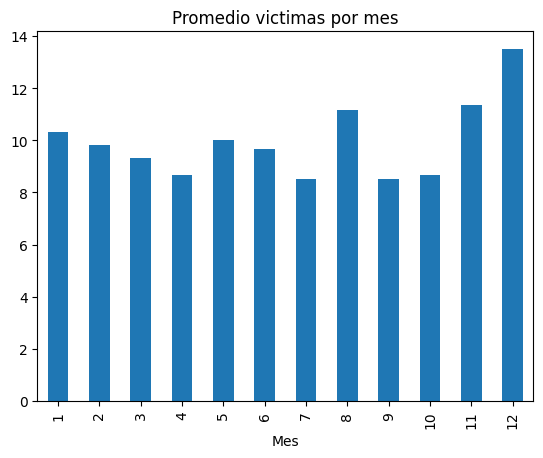

In [ ]:
mensual['Anio'] = mensual.index.year
mensual['Mes'] = mensual.index.month
mensual.groupby(['Mes', 'Anio']).mean().groupby('Mes').mean().plot(kind='bar',legend=False,title='Promedio victimas por mes')

Mes
1     62
2     59
3     56
4     52
5     60
6     58
7     51
8     67
9     51
10    52
11    68
12    81
Name: Id, dtype: int64


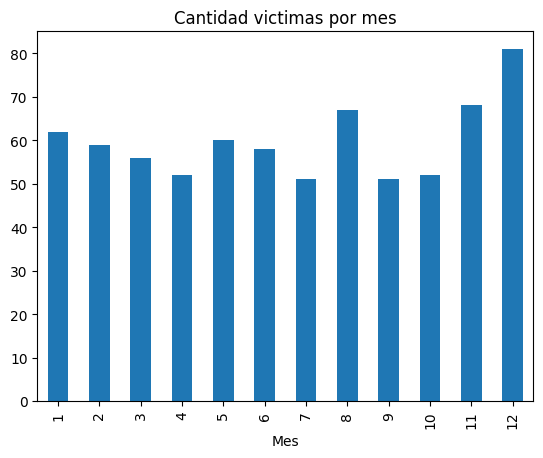

In [ ]:
print(mensual.groupby(['Mes', 'Anio'])['Id'].sum().groupby('Mes').sum())
mensual.groupby(['Mes', 'Anio'])['Id'].sum().groupby('Mes').sum().plot(kind='bar',legend=False,title='Cantidad victimas por mes')
plt.show()


Siguen siendo noviembre y diciembre los meses con mas accidentes.

#### Anual

<Axes: title={'center': 'Promedio de victimas por anio'}, xlabel='Anio'>

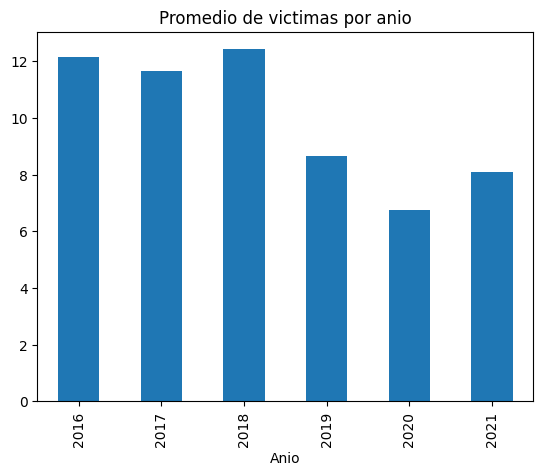

In [ ]:
mensual.groupby(['Mes', 'Anio']).mean().groupby('Anio').mean().plot(kind='bar',legend=False,title='Promedio de victimas por anio')

Anio
2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: Id, dtype: int64


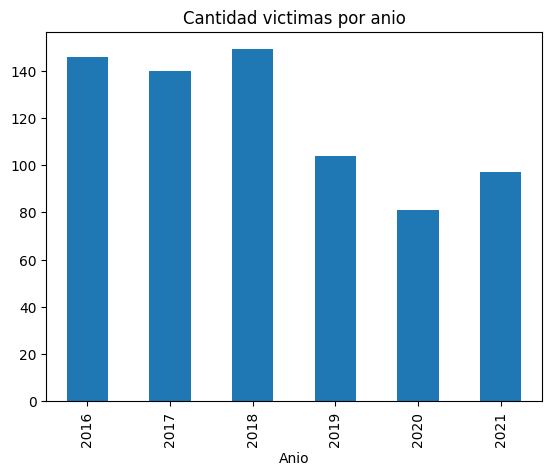

In [ ]:
print(mensual.groupby(['Mes', 'Anio'])['Id'].sum().groupby('Anio').sum())
mensual.groupby(['Mes', 'Anio'])['Id'].sum().groupby('Anio').sum().plot(kind='bar',legend=False,title='Cantidad victimas por anio')
plt.show()

Vemos que los accidentes disminuyeron significativamente en los ultimos anios, mas adelante veremos donde ocurre la disminucion.

Ahora veamos si ocurren en fines de semana o en que dia.

### Por dia de semana

Dia_semana
Monday       107
Tuesday      101
Wednesday     99
Thursday      96
Friday       102
Saturday     107
Sunday       105
Name: Id, dtype: int64


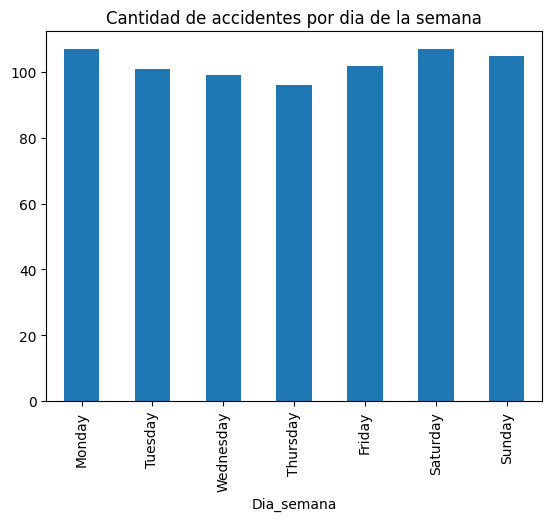

In [ ]:
df['Dia_semana'] = df.Fecha.dt.strftime("%A")
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Dia_semana'] = pd.Categorical(df['Dia_semana'], categories=orden_dias, ordered=True)

print(df[['Dia_semana','Id']].groupby('Dia_semana')['Id'].count())
df[['Dia_semana','Id']].groupby('Dia_semana')['Id'].count().plot(kind='bar',title='Cantidad de accidentes por dia de la semana')
plt.show()

Distribucion teorica con hipotesis de distribucion uniforme: 28.57% vs. realidad: 29.57%


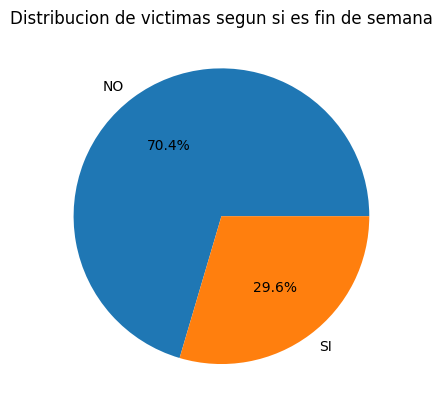

In [ ]:
df_finde = pd.DataFrame(df[['Dia_semana','Id']].groupby('Dia_semana')['Id'].count()).reset_index()
df_finde['Fin_semana'] = df_finde.Dia_semana.apply(lambda x: 'SI' if (x == 'Saturday' or x == 'Sunday') else 'NO')
df_finde = df_finde.groupby('Fin_semana')['Id'].sum()
plt.pie(df_finde,labels=pie.index,autopct='%1.1f%%')
plt.title('Distribucion de victimas segun si es fin de semana')
finde = df_finde.loc['SI']
total = (df_finde.loc['SI'])+df_finde.loc['NO']
print(f'Distribucion teorica con hipotesis de distribucion uniforme: {2/7*100:.2f}% vs. realidad: {finde/total*100:.2f}%')

Parece que en medio de la semana los accidentes disminuyen, pero no hay una tendencia evidente a incrementar en algun momento de la semana.

Y en que momento del dia ocurren?

### Por momento del dia

In [ ]:
franjas_horarias = [0, 5, 11, 13, 18, 23]
etiquetas = ['Madrugada', 'Mañana', 'Mediodia', 'Tarde', 'Noche']

In [ ]:
df['Hh'] = df.Hora.apply(lambda x: x.hour)
df['FranjaHoraria'] = pd.cut(df['Hh'], bins=franjas_horarias, labels=etiquetas, include_lowest=True, ordered=False)
df.drop(columns='Hh',inplace=True)
df.tail(15)


,Id,Fecha,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Cruce,Dirección Normalizada,Comuna,Pos X,Pos Y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Dia_semana,FranjaHoraria
702,2021-0083,2021-11-09,00:35:00,CABILDO AV. Y OLAZABAL,AVENIDA,CABILDO AV.,SI,CABILDO AV. y OLAZABAL,13,-58.458297,-34.560158,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,Tuesday,Madrugada
703,2021-0084,2021-11-11,03:00:00,TAPALQUE Y BRUIX AV.,AVENIDA,TAPALQUE,SI,TAPALQUE y BRUIX AV.,9,-58.491426,-34.645848,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO,CONDUCTOR,MASCULINO,32,Thursday,Madrugada
704,2021-0085,2021-11-20,18:30:00,"PAZ, GRAL. AV. Y EZEIZA",AUTOPISTA,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y EZEIZA",12,-58.512714,-34.577866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,CONDUCTOR,MASCULINO,49,Saturday,Tarde
705,2021-0086,2021-11-25,10:10:00,RIVADAVIA AV. Y PUAN,AVENIDA,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUAN,6,-58.448649,-34.623528,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,75,Thursday,Mañana
706,2021-0087,2021-11-27,11:22:00,ESMERALDA 1359,CALLE,ESMERALDA,NO,ESMERALDA 1359,1,-58.377958,-34.591679,PEATON-BICICLETA,PEATON,BICICLETA,PEATON,FEMENINO,73,Saturday,Mañana
707,2021-0088,2021-12-01,15:40:00,AV. MOROE Y 3 DE FEBRERO,CALLE,MONROE,SI,MONROE y 3 DE FEBRERO,13,-58.455317,-34.555553,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,45,Wednesday,Tarde
708,2021-0089,2021-12-02,01:10:00,AV. GAONA 3655,AVENIDA,GAONA AV.,NO,GAONA AV. 3655,11,-58.476337,-34.621406,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,41,Thursday,Madrugada
709,2021-0090,2021-12-10,11:45:00,AV. 9 DE JULIO Y LAVALLE,AVENIDA,9 DE JULIO AV.,SI,9 DE JULIO AV. y LAVALLE,1,-58.381886,-34.602560,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,73,Friday,Mañana
710,2021-0091,2021-12-11,23:00:00,BAIGORRIA Y VICTOR HUGO,CALLE,BAIGORRIA,SI,"BAIGORRIA y HUGO, VICTOR",10,-58.519894,-34.622849,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,24,Saturday,Noche
711,2021-0092,2021-12-12,06:20:00,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,-58.405969,-34.610120,PEATON-AUTO,PEATON,AUTO,PEATON,FEMENINO,50,Sunday,Mañana


FranjaHoraria
Madrugada    158
Mañana       214
Mediodia      49
Tarde        152
Noche        144
Name: Id, dtype: int64


<Axes: title={'center': 'Cantidad de accidentes por momento del dia'}, xlabel='FranjaHoraria'>

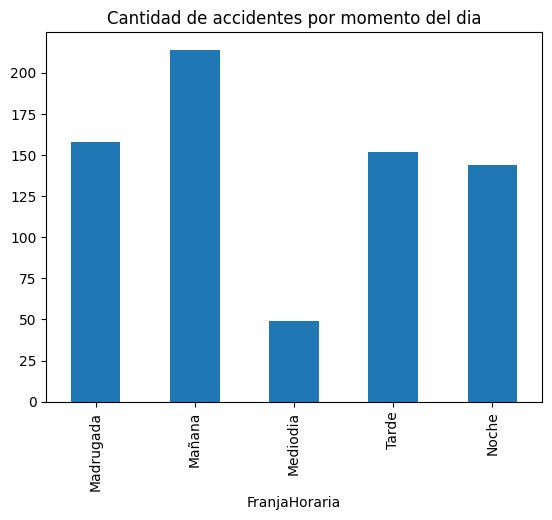

In [ ]:
print(df[['FranjaHoraria','Id']].groupby(['FranjaHoraria'])['Id'].count())
df[['FranjaHoraria','Id']].groupby(['FranjaHoraria'])['Id'].count().plot(kind='bar',title='Cantidad de accidentes por momento del dia')

Parece que la mayor cantidad de accidentes ocurre a la manana, pero de que dia?


Cantidad de accidentes segun Franja Horaria y Dia de la semana

                  Id                                                  
Dia_semana    Monday Tuesday Wednesday Thursday Friday Saturday Sunday
FranjaHoraria                                                         
Madrugada         28      22        14       24     16       22     32
Mañana            30      28        23       26     26       39     42
Mediodia           6       9         4        9      7       10      4
Tarde             23      27        34       19     27       17      5
Noche             20      15        24       18     26       19     22

Porcentaje de accidentes por Franja Horaria, segun dia de la semana

                  Id                                                  
Dia_semana    Monday Tuesday Wednesday Thursday Friday Saturday Sunday
FranjaHoraria                                                         
Madrugada       18.0    14.0       9.0     15.0   10.0     14.0   20.0
Mañana       

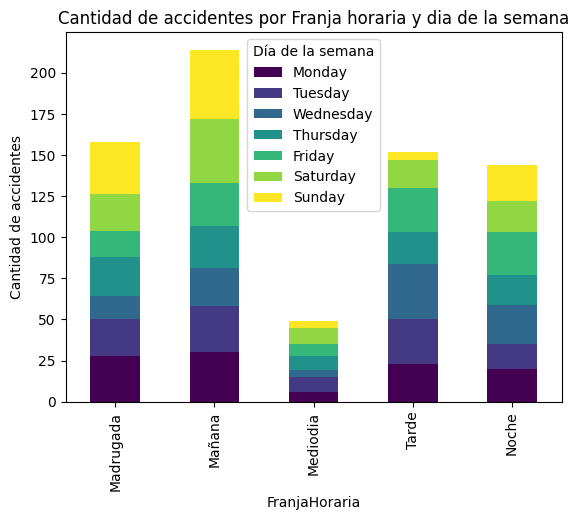

In [ ]:
manana = pd.DataFrame(df[['FranjaHoraria','Id','Dia_semana']].groupby(['FranjaHoraria','Dia_semana'])['Id'].count())
df_pivot = manana.pivot_table(index='FranjaHoraria', columns='Dia_semana', aggfunc='sum')
ax = df_pivot.plot(kind='bar', stacked=True, colormap='viridis')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[i[5:-1] for i in labels], title='Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por Franja horaria y dia de la semana')
print('\nCantidad de accidentes segun Franja Horaria y Dia de la semana\n')
print(df_pivot)
print('\nPorcentaje de accidentes por Franja Horaria, segun dia de la semana\n')
print(round(df_pivot.div(df_pivot.sum(axis=1),axis=0)*100,0))
plt.show()


Encontramos lo siguiente: Domingos a la madrugada y ma;ana, Sabados a la manana y mediodia, viernes a la tarde noche, miercoles a la tarde y lunes a la madrugada como mas importantes.

### Por hora

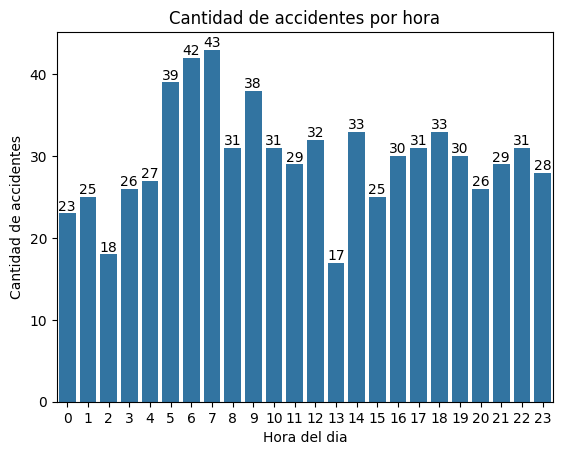

In [ ]:
df['Hh'] = df['Hora'].apply(lambda x: x.hour)
por_hora = pd.DataFrame(df[['Hh','Id']].groupby('Hh')['Id'].count())
# Plotear el gráfico de barras con Seaborn
sns.barplot(data=por_hora.reset_index(), x='Hh', y='Id')

# Añadir etiquetas a las barras
for index, row in por_hora.reset_index().iterrows():
    plt.text(row['Hh'], row['Id'], str(row['Id']), ha='center', va='bottom')

plt.title('Cantidad de accidentes por hora')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de accidentes')
plt.show()


Se puede ver como hay un pico de accidentes entre las 5:00 y las 8:59 de la manana.

### Edad

#### Vs. Anio

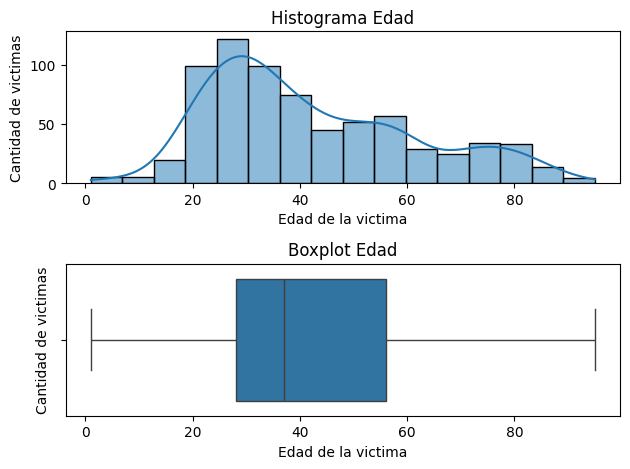

In [ ]:
# veamos la edad de las victimas
plt.subplot(2,1,1)
sns.histplot(data=df,x='Edad',kde=True)
plt.title('Histograma Edad')
plt.ylabel('Cantidad de victimas')
plt.xlabel('Edad de la victima')
plt.subplot(2,1,2)
sns.boxplot(data=df,x='Edad')
plt.title('Boxplot Edad')
plt.xlabel('Edad de la victima')
plt.ylabel('Cantidad de victimas')
plt.tight_layout()

Vemos que hay una clara tendencia a haber accidentes en la gente joven... no sabemos aun si esta relacionado con la distribucion de edades que utilizan transporte o estan en una situacion de mayor riesgo.

Anio
2016    40.150685
2017    39.778571
2018    43.107383
2019    42.038462
2020    47.197531
2021    43.670103
Name: Edad, dtype: float64


Text(0.5, 0, 'Anio')

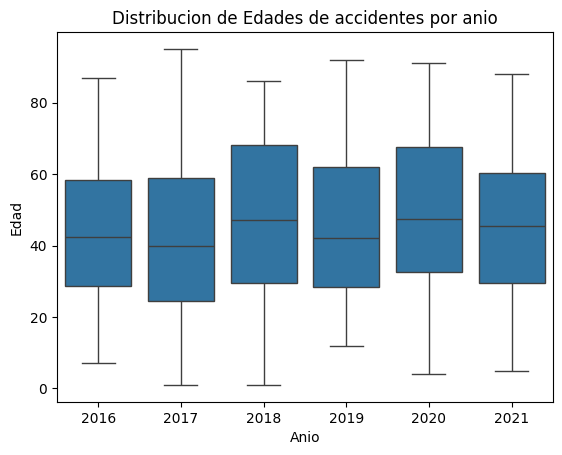

In [ ]:
# varia con los anios?
df['Anio'] = df.Fecha.dt.year
edad_por_anio = pd.DataFrame(df[['Anio','Edad','Id']].groupby(['Anio','Edad'])['Id'].count()).reset_index()
print(df.groupby('Anio')['Edad'].mean())
sns.boxplot(data=edad_por_anio,x='Anio',y='Edad')
plt.title('Distribucion de Edades de accidentes por anio')
plt.xlabel('Anio')


Vemos que claramente no hay cambios notables a lo largo del tiempo, con excepcion del 2020 que fue excepcional por la pandemia

#### Vs. Sexo

           Edad           
Sexo   FEMENINO  MASCULINO
Anio                      
2016  48.518519  38.252101
2017  46.305556  37.519231
2018  52.263158  39.972973
2019  54.370370  37.714286
2020  59.750000  44.107692
2021  47.454545  42.560000


Text(0.5, 0, 'Anio')

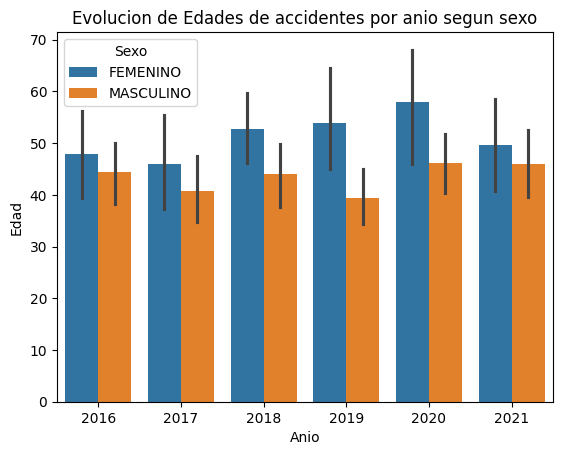

In [ ]:
# veamos por sexo

edad_por_sexo = pd.DataFrame(df[['Anio','Edad','Sexo','Id']].groupby(['Anio','Edad','Sexo'])['Id'].count()).reset_index()
print(pd.DataFrame(df.groupby(['Anio','Sexo'])['Edad'].mean()).reset_index().pivot_table(index='Anio',columns='Sexo'))
sns.barplot(data=edad_por_sexo,x='Anio',y='Edad',hue='Sexo')
plt.title('Evolucion de Edades de accidentes por anio segun sexo')
plt.xlabel('Anio')

Entonces de aca podemos ver dos conclusiones: El promedio de Edad de victimas de accidentes en mujeres es mayor que en hombres y que la tendencia entre 2016 y 2020 de edad de mujeres fue creciente.

### Rol de la victima y caracteristicas del choque

In [ ]:
df.columns

Index(['Id', 'Fecha', 'Hora', 'Lugar_Del_Hecho', 'Tipo_De_Calle', 'Calle',
       'Cruce', 'Dirección Normalizada', 'Comuna', 'Pos X', 'Pos Y',
       'Participantes', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Edad',
       'Dia_semana', 'FranjaHoraria', 'Hh', 'Anio'],
      dtype='object')

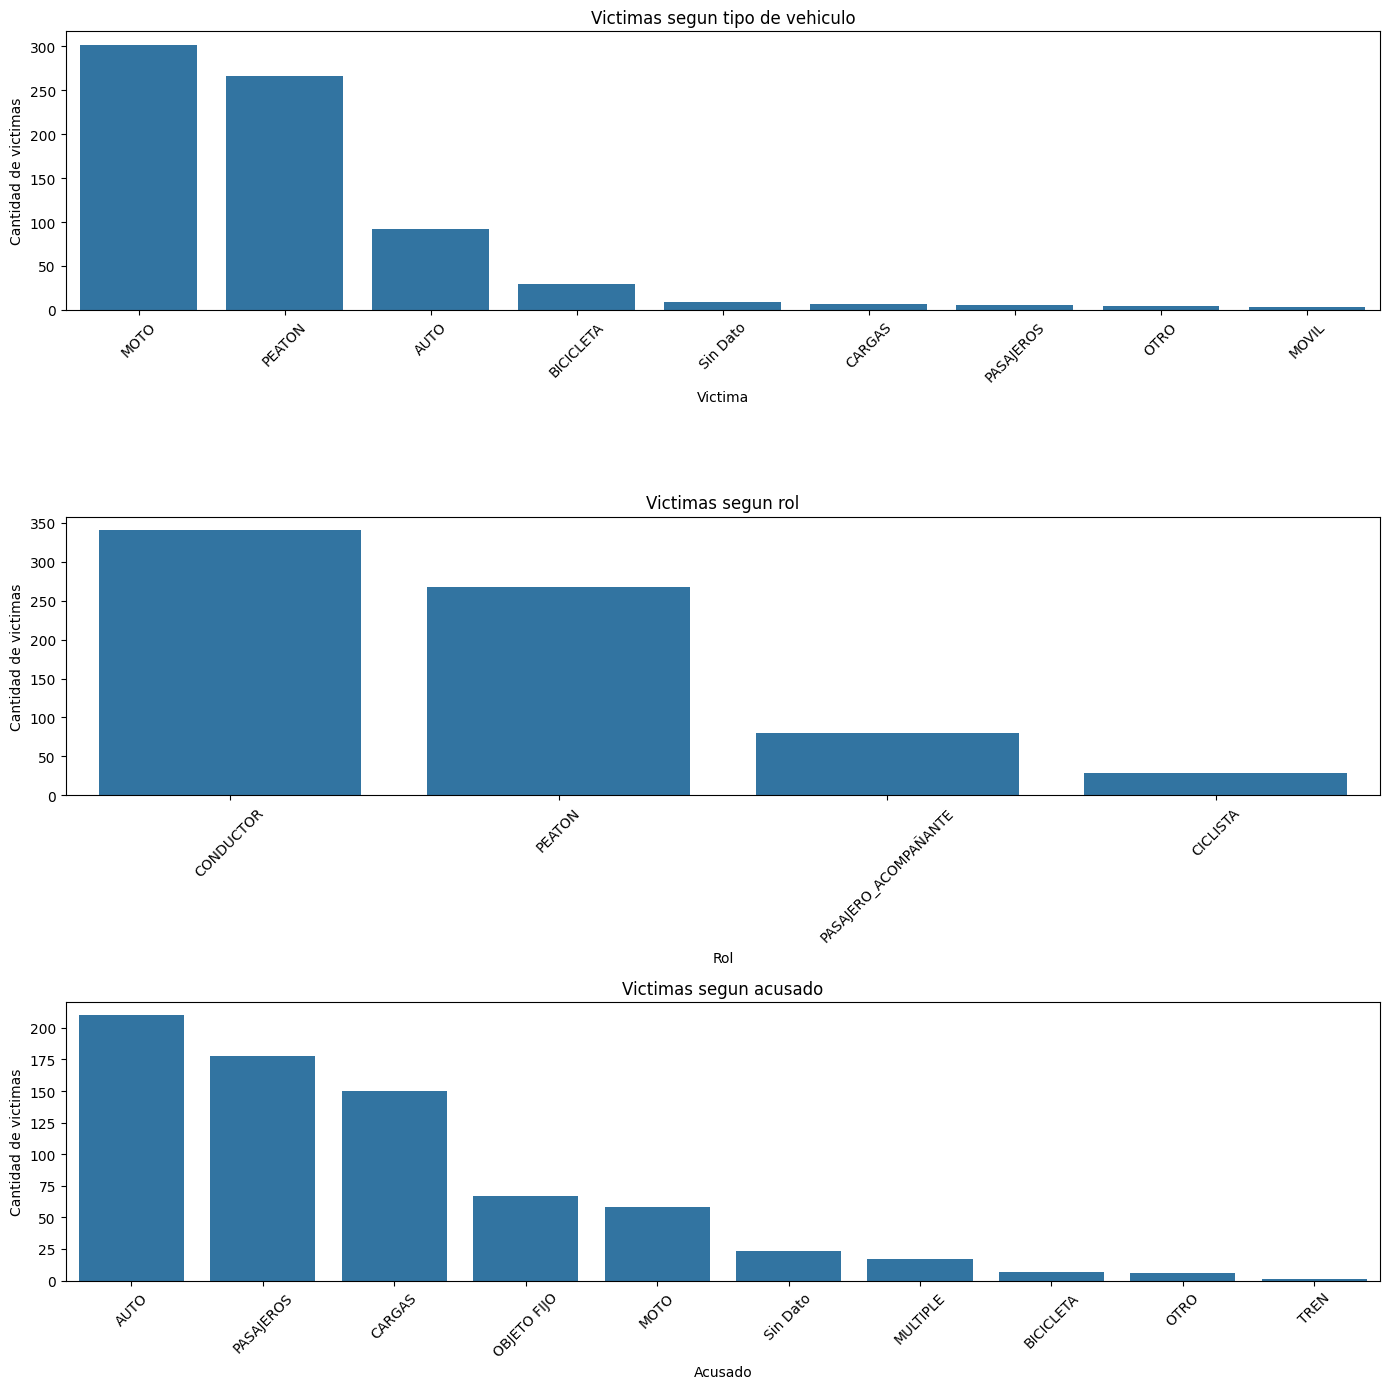

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,1,1)
sns.barplot(data=df.Victima.value_counts())
plt.xticks(rotation=45)
plt.title('Victimas segun tipo de vehiculo')
plt.ylabel('Cantidad de victimas')
plt.subplot(3,1,2)
sns.barplot(data=df.Rol.value_counts())
plt.xticks(rotation=45)
plt.title('Victimas segun rol')
plt.ylabel('Cantidad de victimas')
plt.subplot(3,1,3)
sns.barplot(data=df.Acusado.value_counts())
plt.xticks(rotation=45)
plt.title('Victimas segun acusado')
plt.ylabel('Cantidad de victimas')
plt.tight_layout()

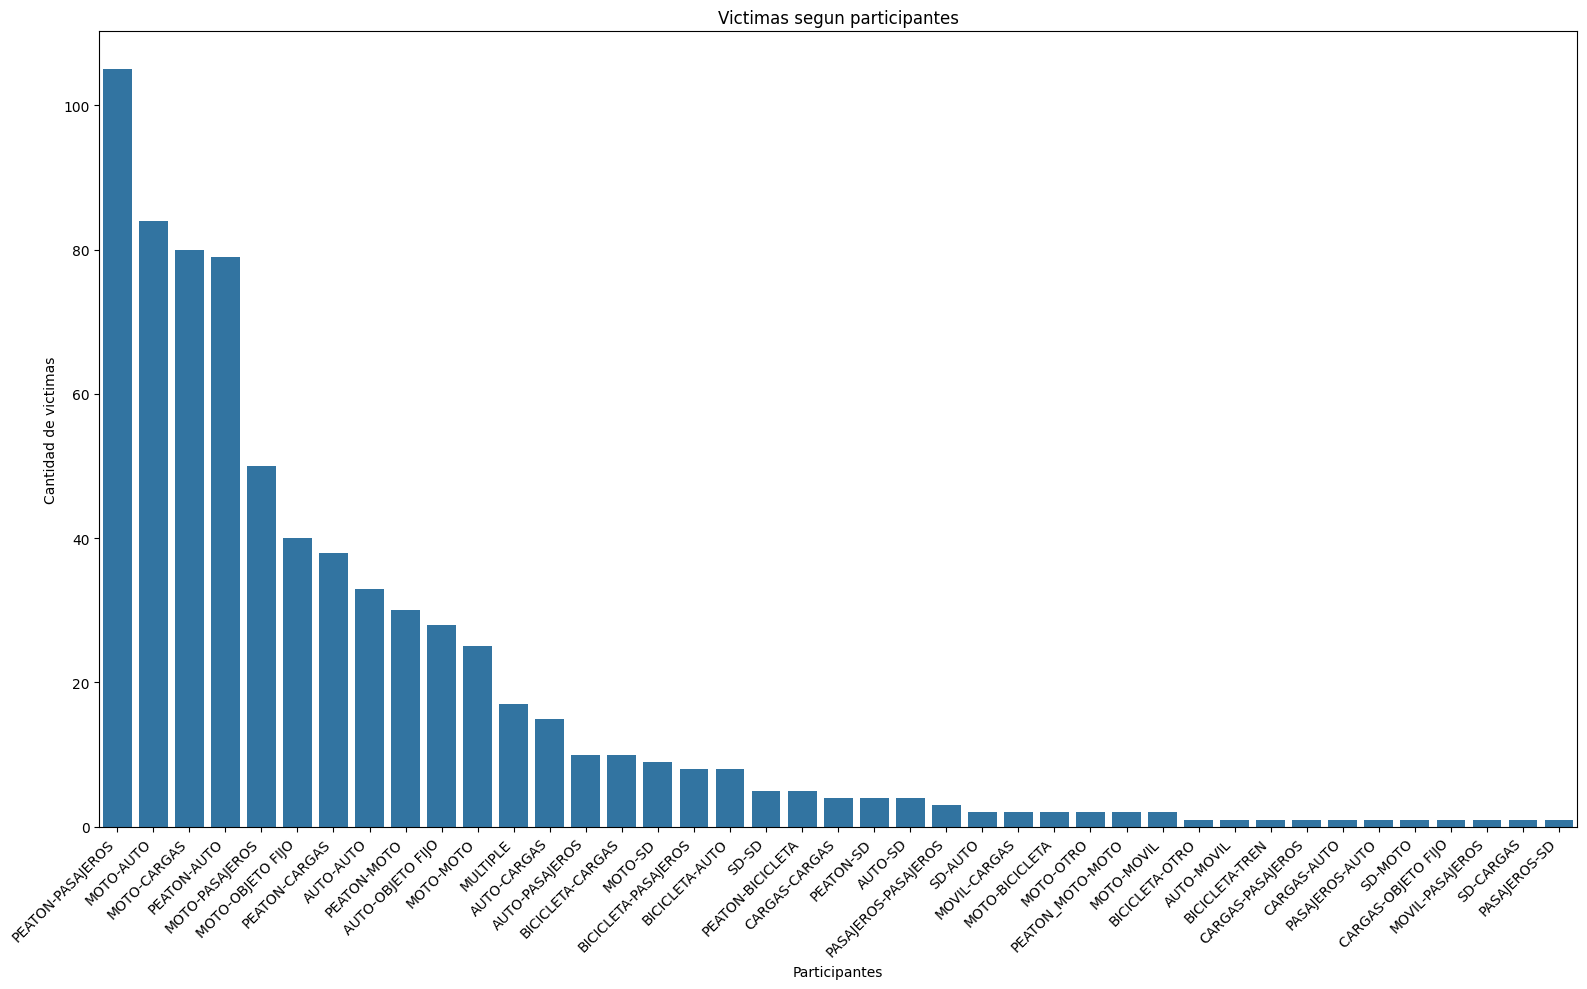

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(data=df.Participantes.value_counts())
plt.xticks(rotation=45,ha='right')
plt.title('Victimas segun participantes')
plt.ylabel('Cantidad de victimas')
plt.tight_layout()

Las conclusiones que obtenemos son que la mayor cantidad de victimas son las motos y los peatones, siendo mayormente victima el conductor y el peaton; y que los responsables son mayormente autos, pasajeros(podemos suponer que corresponde a un pasajero de un transporte que genere la situacion, definido como transporte publico y larga distancia unicamente) y cargas.

Por otro lado, veamos mejor la combinacion Victima: Peaton Acusado: Pasajero. Suponemos que corresponde a un pasajero que genera una situacion de accidente hacia un peaton subiendo o bajando del transporte publico. Pero verifiquemoslo:

In [ ]:
df[['Participantes','Acusado','Victima']][df['Participantes']=='PEATON-PASAJEROS'].value_counts()

Participantes     Acusado    Victima
PEATON-PASAJEROS  PASAJEROS  PEATON     105
Name: count, dtype: int64

Efectivamente parece que es asi como hemos dicho.

### Tipo de calle

Text(0.5, 1.0, 'Distribucion de victimas segun tipo de calle del suceso')

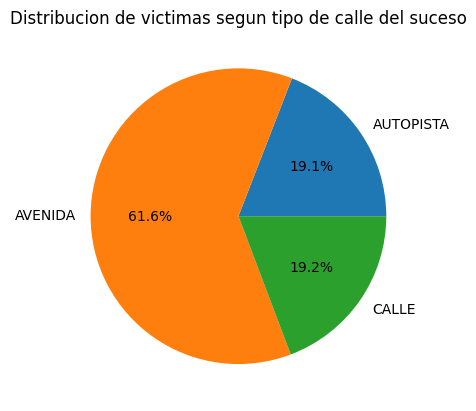

In [ ]:
df_pie_tc = df.groupby('Tipo_De_Calle')['Id'].count()
plt.pie(df_pie_tc,labels=df_pie_tc.index,autopct='%1.1f%%')
plt.title('Distribucion de victimas segun tipo de calle del suceso')

Text(0.5, 1.0, 'Distribucion de victimas segun si ocurre en Cruce')

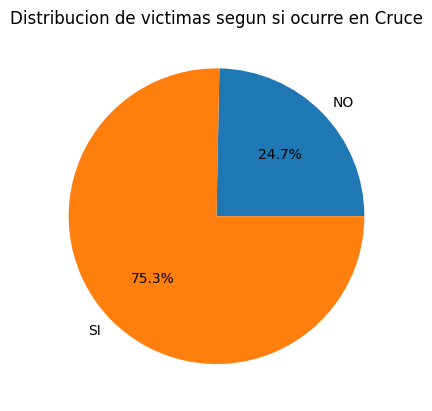

In [ ]:
df_pie_cruce = df.groupby('Cruce')['Id'].count()
plt.pie(df_pie_cruce,labels=df_pie_cruce.index,autopct='%1.1f%%')
plt.title('Distribucion de victimas segun si ocurre en Cruce')

De ambos graficos podemos concluir que los cruces son efectivamente tendientes a ocurrir sucesos y en las avenidas. Ambos datos evidentemente se relacionan con las victimas mas frecuentes, peatones y motos... y el par victima-pasajero: en donde hay mas movimiento de transporte publico y mas cruces ocurren los sucesos.

### Comuna

In [ ]:
# no nos debemos olvidar del analisis por comuna, porque habra algunas con mayor transito que otras
# es alli en donde podemos optimizar los recursos a utilizar por el estado para disminuir las victimas

#primero debemos entender que es cada comuna, para eso hagamos un scrapping con los barrios de cada comuna:

url = 'https://www.indec.gob.ar/ftp/cuadros/poblacion/c2022_caba_est_c2_1.xlsx'

response = requests.get(url)

if response.status_code == 200:

    excel_content = BytesIO(response.content)

    df_indec = pd.read_excel(excel_content,sheet_name='Cuadro 2.1')

    print(df_indec.head())
else:
    print(f'Error al realizar la solicitud. Código de estado: {response.status_code}')

  Censo Nacional de Poblacion, Hogares y Viviendas 2022 Unnamed: 1  \
0  Cuadro 2.1. Ciudad Autónoma de Buenos Aires. T...           NaN   
1                                             Código        Comuna   
2                                                NaN           NaN   
3                                                NaN           NaN   
4                                                 02         Total   

          Unnamed: 2       Unnamed: 3        Unnamed: 4  
0                NaN              NaN               NaN  
1  Superficie en km2              Año               NaN  
2                NaN             2022               NaN  
3                NaN  Población total  Densidad hab/km2  
4              205.9          3121707           15161.3  


In [ ]:
# para ahora, solo nos interesa el valor del indice 20 y la columna 'Censo ...'
notas = df_indec.iloc[20,0]
notas = notas.split('\n')
notas = notas[1:]
comunas = {}
for i in notas:
    objeto = i[7:].split(':')
    comunas.update({objeto[0]:objeto[1].strip()})

comunas.update({'0':'Sin Dato'})

Text(0, 0.5, 'Cantidad de victimas')

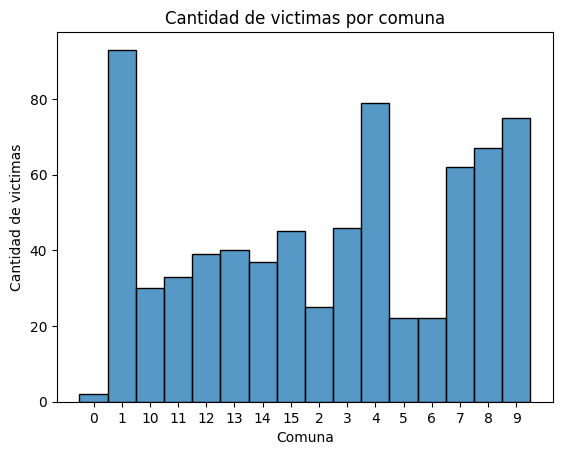

In [ ]:
df['Comuna'] = df['Comuna'].apply(str)
df.sort_values('Comuna',inplace=True)
sns.histplot(data=df,x='Comuna')
plt.title('Cantidad de victimas por comuna')
plt.ylabel('Cantidad de victimas')

In [ ]:
print(f'Las comunas con mayor cantidad de victimas: \n')
comunas_df = pd.DataFrame(df.Comuna.value_counts()).reset_index()
comunas_df['Barrios'] = comunas_df.Comuna.apply(lambda x: comunas[x])
comunas_df.set_index('Comuna',inplace=True)
comunas_df

Las comunas con mayor cantidad de victimas: 



,count,Barrios
Comuna,,
1,93,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."
4,79,"La Boca, Barracas, Parque Patricios y Nueva Po..."
9,75,"Liniers, Mataderos y Parque Avellaneda."
8,67,"Villa Soldati, Villa Riachuelo y Villa Lugano."
7,62,Flores y Parque Chacabuco.
3,46,Balvanera y San Cristóbal.
15,45,"Chacarita, Villa Crespo, La Paternal, Villa Or..."
13,40,"Núñez, Belgrano y Colegiales."
12,39,"Coghlan, Saavedra, Villa Urquiza y Villa Pueyr..."


Vemos que en cierto punto, los barrios con mayor movimiento son los que mas accidentes tienen, sin embargo no todos... a desarrollar mas adelante.

Todo lo visto tiene sentido pero en muchos casos nos falta una cuantificacion relativa, es decir... 100 victimas, es mucho? o es poco? Porque? Estan reduciendose las victimas por medidas de seguridad o porque la ciudad esta mas despoblada? En fin, desrelativizar el analisis.

Es por eso que vamos a guardar esta base de datos y luego avanzaremos con el webscrapping de la poblacion en CABA por comuna para poder sacar indices que permitan verificar el estado relativo y su evolucion.

In [ ]:
df.Lugar_Del_Hecho = df.Lugar_Del_Hecho.apply(lambda x: x.replace('\n\n',''))
df[df.Id == '2018-0069']

,Id,Fecha,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Cruce,Dirección Normalizada,Comuna,Pos X,...,Participantes,Victima,Acusado,Rol,Sexo,Edad,Dia_semana,FranjaHoraria,Hh,Anio
357,2018-0069,2018-07-04,21:45:00,Córdoba Av. 2215,AVENIDA,CORDOBA AV.,NO,CORDOBA AV. 2215,2,-58.398971,...,BICICLETA-PASAJEROS,BICICLETA,PASAJEROS,CICLISTA,MASCULINO,20,Wednesday,Noche,21,2018


In [ ]:
df.to_csv('Datasets/homicidios.csv',index=False)